In [1]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting import Backtest
import pandas as pd
from backtesting.test import SMA
import pandas as pd
from bokeh.io import export_png
from backtesting.lib import SignalStrategy, TrailingStrategy
from backtesting import Position

/Users/fahad/anaconda3/lib/python3.7/site-packages/backtesting/_plotting.py:34: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `bokeh.io.reset_output()`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
NFLX_predictions = pd.read_csv("/Users/fahad/project_repo/models/final_models/Financial_Analysis/predictions/NFLX_predictions_SVM.csv", index_col=0)


In [3]:
NFLX_predictions.head()

,Date,Predictions
0,2019-07-31,0
1,2019-06-28,0
2,2019-05-31,0
3,2019-04-30,0
4,2019-03-29,0


In [4]:
NFLX_predictions.Date = pd.to_datetime(NFLX_predictions.Date, format="%Y-%m-%d")

In [5]:
NFLX_predictions['Predictions'] = NFLX_predictions['Predictions'].shift(-1)


In [6]:
NFLX_predictions = NFLX_predictions.dropna()


In [7]:
NFLX_predictions = NFLX_predictions[::-1]

In [8]:
NFLX_predictions.head(10)

,Date,Predictions
112,2010-03-31,1.0
111,2010-04-30,1.0
110,2010-05-28,1.0
109,2010-06-30,1.0
108,2010-07-30,1.0
107,2010-08-31,1.0
106,2010-09-30,0.0
105,2010-10-29,1.0
104,2010-11-30,0.0
103,2010-12-31,1.0


In [9]:
NFLX_monthly = pd.read_csv("/Users/fahad/project_repo/data/final/NFLX/NFLX_monthly.csv", index_col =0)

In [10]:
NFLX_monthly.columns = ['Open','High','Low','Close','Volume']

In [11]:
NFLX_predictions = NFLX_predictions.set_index("Date")

In [12]:
NFLX_monthly.tail()

,Open,High,Low,Close,Volume
2002-10-31,9.930,10.30,4.85,8.971,12093806
2002-09-30,13.110,13.67,9.65,9.700,3984231
2002-08-30,13.301,13.99,9.89,13.110,4635214
2002-07-31,14.000,18.19,11.90,13.350,5258635
2002-06-28,15.120,17.25,11.79,13.990,5357226


In [13]:
NFLX_final_df = pd.merge(NFLX_predictions, NFLX_monthly, right_index=True, left_index=True)

In [14]:
NFLX_final_df.index = pd.to_datetime(NFLX_final_df.index, format ="%Y-%m-%d")

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

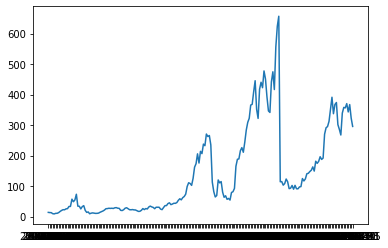

In [16]:
plt.plot(NFLX_monthly.index[::-1], NFLX_monthly.Close[::-1])

In [17]:
equity_dict = dict()

In [18]:
class Binary_Classification_1d(TrailingStrategy):

    
    def init(self):
        
        super().init()
        self.data.Predictions
        
    def next(self):
        super().init()
        equity_dict[self.data.index[-1]] = TrailingStrategy.equity.__get__(self)
        
        position = Strategy.position.__get__(self)
        
        if self.data.Predictions[-1] == 1.0 and (position.is_long != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif self.data.Predictions[-1] == 0.0 and (position.is_short != True) :
#             print("\n")
#             print (self.data.Prediction[-1])
            
            self.sell()
            
 

In [19]:
bt = Backtest(NFLX_final_df, Binary_Classification_1d, cash=1000, commission= 0.09)
bt.run()



Start                          2010-03-31 00:00:00
End                            2019-07-31 00:00:00
Duration                        3409 days 00:00:00
Exposure [%]                               96.5092
Equity Final [$]                            410455
Equity Peak [$]                             439879
Return [%]                                 40945.5
Buy & Hold Return [%]                      338.012
Max. Drawdown [%]                         -42.7956
Avg. Drawdown [%]                         -10.5319
Max. Drawdown Duration           733 days 00:00:00
Avg. Drawdown Duration           118 days 00:00:00
# Trades                                        35
Win Rate [%]                               65.7143
Best Trade [%]                             181.813
Worst Trade [%]                           -25.4209
Avg. Trade [%]                             23.2563
Max. Trade Duration              305 days 00:00:00
Avg. Trade Duration               94 days 00:00:00
Expectancy [%]                 

In [20]:
bt.plot(superimpose=False, plot_volume=False)

In [21]:
df = pd.DataFrame.from_dict([equity_dict])

In [22]:
df = df.T

In [23]:
df.columns = ['Equity']

In [24]:
export = df.to_csv("/Users/fahad/project_repo/data/final/Equity/SVM/NFLX_SVM_Equity.csv")

In [25]:
df

,Equity
2010-04-30,1000.000000
2010-05-28,1020.132824
2010-06-30,997.187866
2010-07-30,941.202169
2010-08-31,1152.020441
2010-09-30,1488.301743
2010-10-29,1243.069402
2010-11-30,1346.422857
2010-12-31,1439.465583
2011-01-31,1620.234963
